**IMDb Movie EDA Project**

**Problem Objective**
The film industry often faces uncertainty in deciding which genres, budgets, and markets will yield the best returns.
This dataset allows us to analyze historical IMDb movie data to uncover trends in production, audience ratings, and financial performance. 
Our goal is to provide evidence-based insights to help producers, studios, and investors make informed decisions on movie production strategies.

Import libraries and load dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("downloads/movie_metadata.csv")

 Basic info and data cleaning

In [2]:
df.head()               

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.tail()  

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [4]:
df.shape                # 5043 rows, 28 columns
df.columns              # List of all columns
df.info()               # See null values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [6]:
#count null values in each column
df.isnull().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
language                      14
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [7]:
# Drop rows where key values are missing
df = df.dropna(subset=['gross', 'director_name'])

# Fill text columns with placeholder
df['actor_1_name'] = df['actor_1_name'].fillna('Unknown')
df['actor_2_name'] = df['actor_2_name'].fillna('Unknown')
df['actor_3_name'] = df['actor_3_name'].fillna('Unknown')

# Fill numeric with median
df['duration'] = df['duration'].fillna(df['duration'].median())
df['budget'] = df['budget'].fillna(df['budget'].median())
df['facenumber_in_poster'] = df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].median())
df['num_critic_for_reviews'] = df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].median())
df['num_user_for_reviews'] = df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].median())

# Fill categorical columns
df['aspect_ratio'] = df['aspect_ratio'].fillna(df['aspect_ratio'].mode()[0])
df['content_rating'] = df['content_rating'].fillna("Not Rated")
df['language'] = df['language'].fillna("English")
df['color'] = df['color'].fillna("Color")


In [8]:
(df == 0).sum().sort_values(ascending=False)  # counting zeors in each column 

movie_facebook_likes         1890
facenumber_in_poster         1766
director_facebook_likes       720
actor_3_facebook_likes         49
actor_2_facebook_likes         27
cast_total_facebook_likes      15
actor_1_facebook_likes         11
movie_imdb_link                 0
aspect_ratio                    0
imdb_score                      0
title_year                      0
budget                          0
content_rating                  0
country                         0
language                        0
num_user_for_reviews            0
color                           0
plot_keywords                   0
director_name                   0
num_voted_users                 0
movie_title                     0
actor_1_name                    0
genres                          0
gross                           0
actor_2_name                    0
duration                        0
num_critic_for_reviews          0
actor_3_name                    0
dtype: int64

In [9]:
# Drop columns that are not useful
df.drop(['director_facebook_likes',
         'actor_1_facebook_likes',
         'actor_2_facebook_likes',
         'actor_3_facebook_likes',
         'cast_total_facebook_likes',
         'movie_facebook_likes',], axis=1, inplace=True)

In [10]:
df.drop('plot_keywords', axis=1, inplace=True)

In [11]:
df.isnull().sum().sum()

0

In [12]:
#Checking for duplicates
df.duplicated().sum()

36

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
#Saving the cleaned dataset
df.to_csv("IMDb_Cleaned.csv", index=False)

In [15]:
df = pd.read_csv("IMDb_Cleaned.csv")

budget → Outliers found: 301
gross → Outliers found: 304


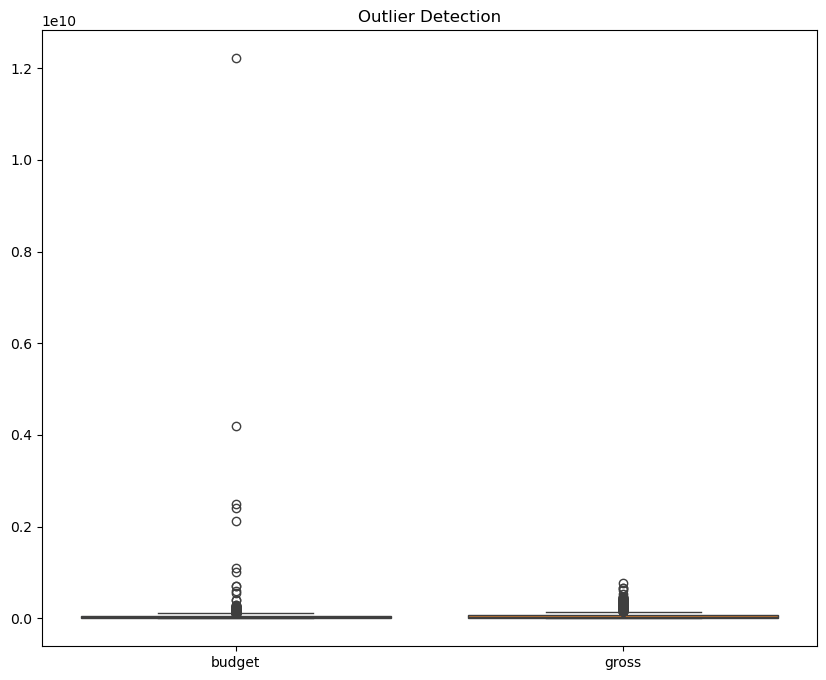

In [16]:
numeric_cols = ['budget', 'gross']

# Outlier counts
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} → Outliers found: {len(outliers)}")

# boxplot
plt.figure(figsize=(10,8))
sns.boxplot(data=df[numeric_cols])
plt.title('Outlier Detection')
plt.show()


#Q1: What are the top 10 highest-grossing movies

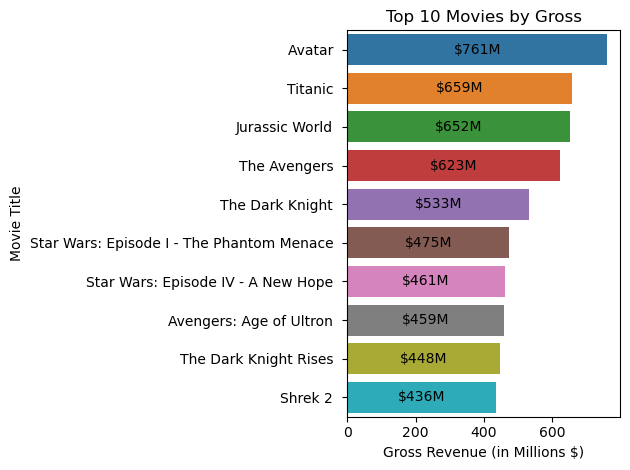

In [17]:
top_10 = df.sort_values(by='gross', ascending=False).head(10)
top_10[['movie_title', 'gross']]
top_10['gross_million'] = top_10['gross'] / 1000000

data_label= sns.barplot(x='gross_million', y='movie_title', data=top_10, hue='movie_title')
for container in data_label.containers:data_label.bar_label(container, fmt='${:,.0f}M', label_type='center')

plt.title("Top 10 Movies by Gross")
plt.xlabel("Gross Revenue (in Millions $)")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()

2.	What is the distribution of IMDb scores among the movies?

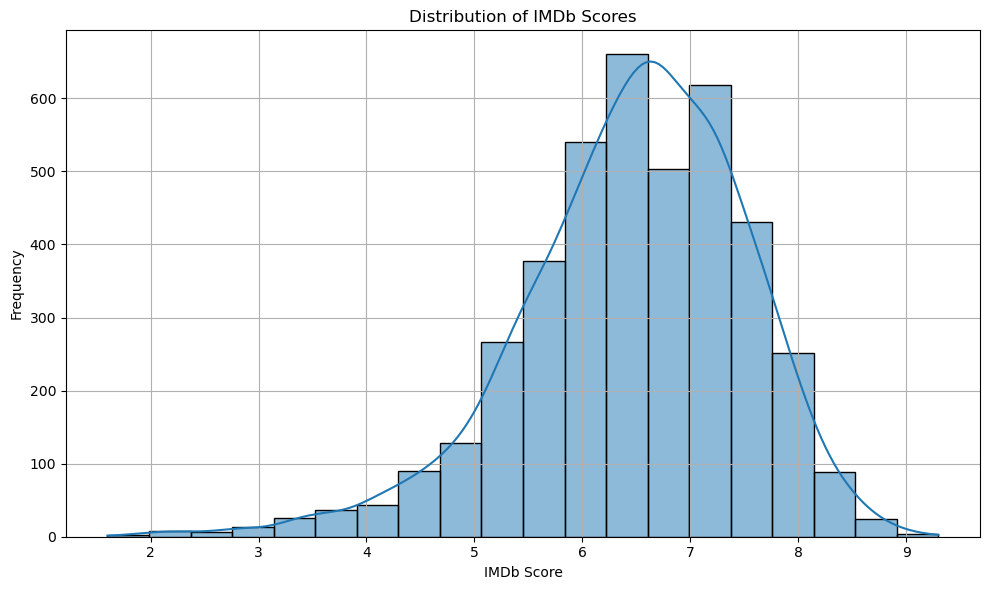

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['imdb_score'], bins=20, kde=True)
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

3.	How does the number of faces in a movie poster relate to its gross revenue?

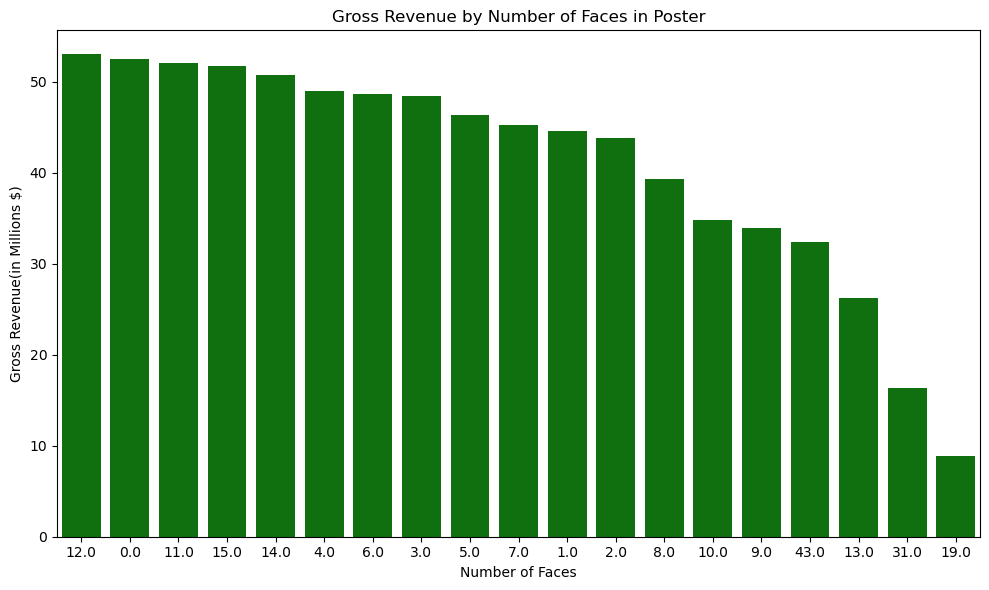

In [19]:
sorted_df = df.groupby('facenumber_in_poster', as_index= False)['gross'].mean().sort_values(by='gross',ascending = False)
plt.figure(figsize=(10, 6))
sorted_df['gross_million'] = sorted_df['gross'] / 1000000
sns.barplot(x='facenumber_in_poster', y='gross_million', data=sorted_df, order=sorted_df['facenumber_in_poster'],color='green')
plt.title('Gross Revenue by Number of Faces in Poster')
plt.xlabel('Number of Faces')
plt.ylabel('Gross Revenue(in Millions $)')
plt.tight_layout()
plt.show()

4.	Does the movie budget influence the IMDb rating or gross earnings?

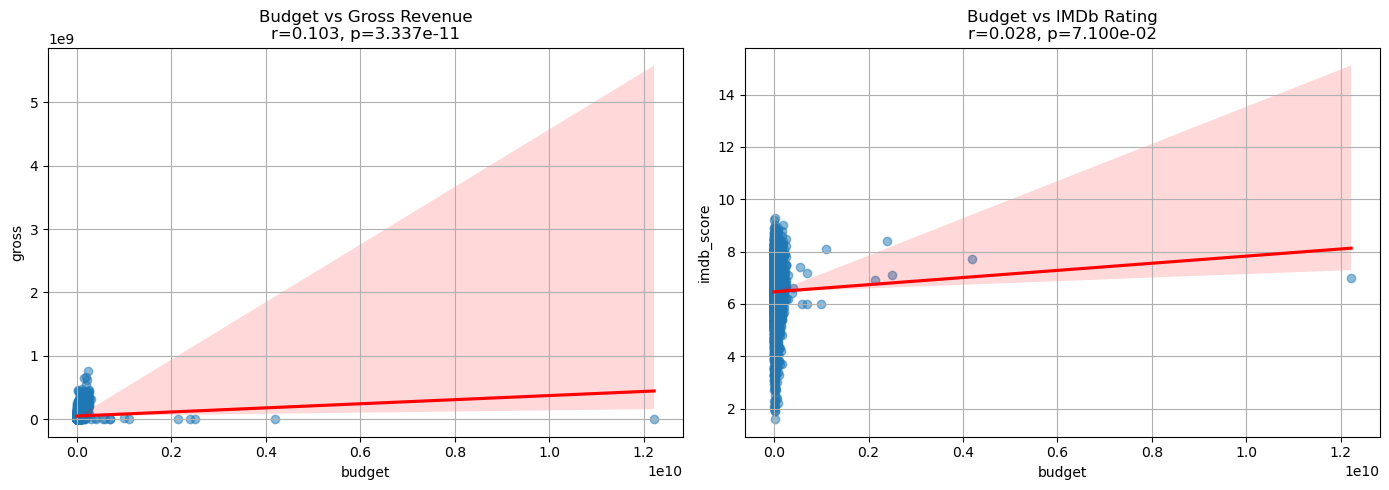

Budget vs Gross Revenue (n=4120): r=0.103, p=3.337e-11
Budget vs IMDb Rating (n=4120): r=0.028, p=7.100e-02


In [20]:
from scipy.stats import pearsonr

# Calculate correlations
r1, p1 = pearsonr(df['budget'], df['gross'])
r2, p2 = pearsonr(df['budget'], df['imdb_score'])

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Budget vs Gross Revenue 
sns.regplot(x='budget', y='gross', data=df, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5}, ax=axes[0])
axes[0].set_title(f"Budget vs Gross Revenue\nr={r1:.3f}, p={p1:.3e}")
axes[0].grid(True)

# Budget vs IMDb Rating 
sns.regplot(x='budget', y='imdb_score', data=df, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5}, ax=axes[1])
axes[1].set_title(f"Budget vs IMDb Rating\nr={r2:.3f}, p={p2:.3e}")
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Print stats in console too
print(f"Budget vs Gross Revenue (n={len(df)}): r={r1:.3f}, p={p1:.3e}")
print(f"Budget vs IMDb Rating (n={len(df)}): r={r2:.3f}, p={p2:.3e}")

5.	Which genres are most common, and how do they perform in terms of revenue?

Most common genres (top 10):
genre
Drama        2119
Comedy       1615
Thriller     1158
Action        977
Romance       945
Adventure     803
Crime         755
Fantasy       525
Sci-Fi        505
Family        469
Name: count, dtype: int64

Revenue performance by genre (top 10 by total gross):
genre
Animation    1.069542e+08
Adventure    9.782732e+07
Family       8.950663e+07
Fantasy      8.528532e+07
Sci-Fi       8.130232e+07
Action       7.573329e+07
Musical      5.314688e+07
Comedy       4.779358e+07
Thriller     4.704363e+07
Mystery      4.482212e+07
Name: gross, dtype: float64


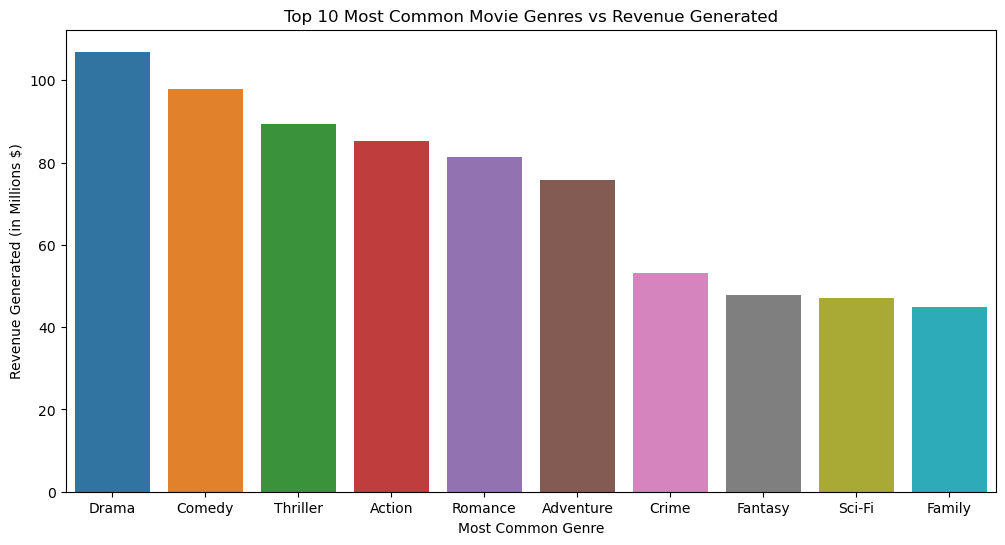

In [21]:
#  Split genres into lists
df['genres_list'] = df['genres'].str.split('|')
# Explode genres so each genre has its own row
df_exploded = df.explode('genres_list')
# Rename column for clarity
df_exploded.rename(columns={'genres_list': 'genre'}, inplace=True)
# Count how many movies belong to each genre
genre_counts = df_exploded['genre'].value_counts()

# Calculate total and average gross revenue by genre
genre_revenue = df_exploded.groupby('genre')['gross'].mean().sort_values( ascending=False)

#results
print("Most common genres (top 10):")
print(genre_counts.head(10))

print("\nRevenue performance by genre (top 10 by total gross):")
print(genre_revenue.head(10))

#Visualize the results
plot_df = pd.DataFrame({'genre': genre_counts.head(10).index,'count': genre_counts.head(10).values,'avg_gross': genre_revenue.head(10).values/1000000})
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df,x='genre', y='avg_gross',hue='genre', legend=False)
plt.title('Top 10 Most Common Movie Genres vs Revenue Generated')
plt.xlabel('Most Common Genre')
plt.ylabel('Revenue Generated (in Millions $)')
plt.show()


6.	Which directors have the highest average IMDb score across their movies?

Top 10 Directors by Average IMDb Score:
director_name
Charles Chaplin      8.600000
Majid Majidi         8.500000
Damien Chazelle      8.500000
Ron Fricke           8.500000
Alfred Hitchcock     8.500000
Tony Kaye            8.450000
Sergio Leone         8.433333
Christopher Nolan    8.425000
Richard Marquand     8.400000
S.S. Rajamouli       8.400000
Name: imdb_score, dtype: float64


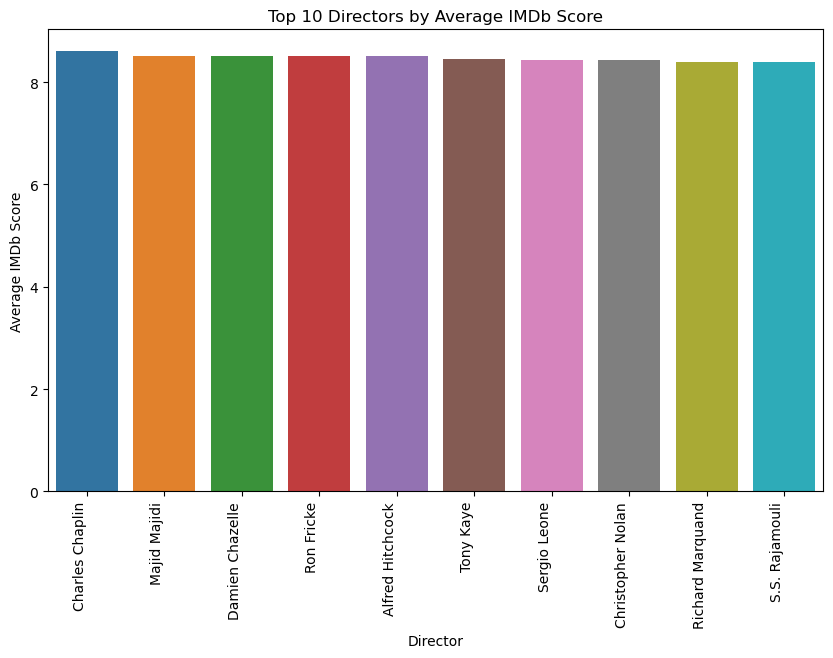

In [22]:
# Group by director and calculate average IMDb score
director_avg_score = df.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False)
#Display top 10 directors by average IMDb score
top10_director = director_avg_score.head(10)
print("Top 10 Directors by Average IMDb Score:")
print(top10_director)
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_director.index, y=top10_director.values, hue=top10_director.index)
plt.title('Top 10 Directors by Average IMDb Score')
plt.xlabel('Director')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=90, ha='right')
plt.show()

7.	How does the number of critic reviews correlate with IMDb score and gross?

Correlation between Number of Critic Reviews and IMDb Score: 0.335
Correlation between Number of Critic Reviews and Gross Revenue: 0.477


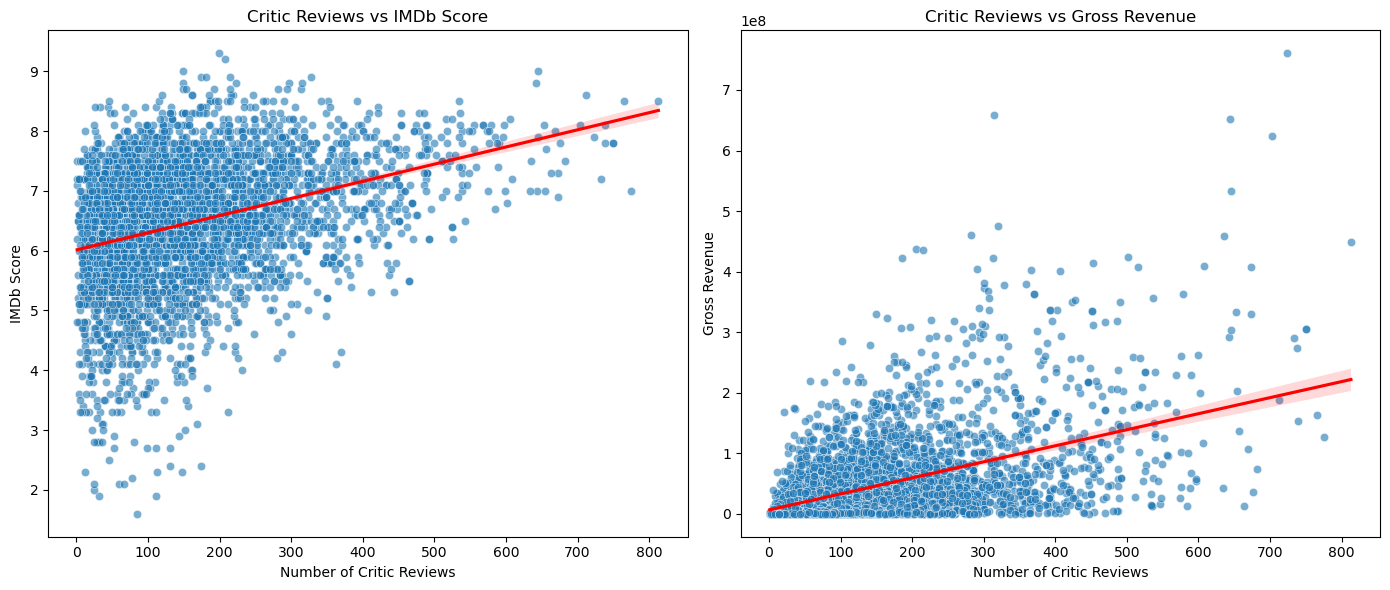

In [23]:
# Calculate correlations
corr_imdb = df['num_critic_for_reviews'].corr(df['imdb_score'])   # correlation with IMDb score
corr_gross = df['num_critic_for_reviews'].corr(df['gross'])       # correlation with gross revenue

print(f"Correlation between Number of Critic Reviews and IMDb Score: {corr_imdb:.3f}")
print(f"Correlation between Number of Critic Reviews and Gross Revenue: {corr_gross:.3f}")

#Visualize relationships
plt.figure(figsize=(14, 6))

# IMDb score vs critic reviews
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='num_critic_for_reviews', y='imdb_score', alpha=0.6)
sns.regplot(data=df, x='num_critic_for_reviews', y='imdb_score', scatter=False, color='red')
plt.title('Critic Reviews vs IMDb Score')
plt.xlabel('Number of Critic Reviews')
plt.ylabel('IMDb Score')

# Gross revenue vs critic reviews
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='num_critic_for_reviews', y='gross', alpha=0.6)
sns.regplot(data=df, x='num_critic_for_reviews', y='gross', scatter=False, color='red')
plt.title('Critic Reviews vs Gross Revenue')
plt.xlabel('Number of Critic Reviews')
plt.ylabel('Gross Revenue')

plt.tight_layout()
plt.show()

8.	Which languages dominate the dataset and how do they perform?

Top 10 Languages by Movie Count with Performance:
            movie_count  avg_imdb_score     avg_gross
language                                             
Maya                  1        7.800000  5.085989e+07
English            3897        6.426713  5.084372e+07
Aboriginal            2        6.950000  3.934039e+07
Mandarin             16        6.956250  1.020849e+07
Filipino              1        6.700000  1.016650e+07
Spanish              30        7.060000  8.577084e+06
Dari                  2        7.500000  8.462619e+06
Telugu                1        8.400000  6.498000e+06
Cantonese            10        7.120000  6.429425e+06
Mongolian             1        7.300000  5.701643e+06


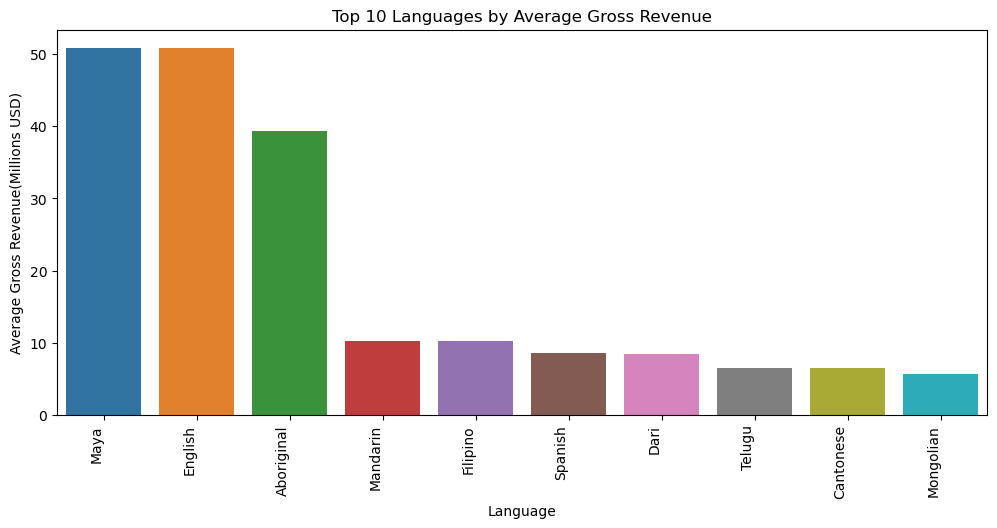

In [24]:
language_performance = df.groupby('language').agg(movie_count = ('language','count'),avg_imdb_score = ('imdb_score','mean'),avg_gross = ('gross','mean')).sort_values(by='avg_gross', ascending=False)
top_languages = language_performance.head(10)
print("Top 10 Languages by Movie Count with Performance:")
print(top_languages)
#Visualization —column chart for movie count
plt.figure(figsize=(12, 5))
sns.barplot(x=top_languages.index, y=top_languages['avg_gross']/1000000,hue=top_languages.index)
plt.title('Top 10 Languages by Average Gross Revenue')
plt.xlabel('Language')
plt.ylabel('Average Gross Revenue(Millions USD)')
plt.xticks(rotation=90, ha='right')
plt.show()

9. What is the average budget and revenue per genre?

Average Budget and Revenue per Genre:
                   budget         gross
genre                                  
Animation    1.053784e+08  1.069542e+08
Adventure    8.472409e+07  9.782732e+07
Family       6.805438e+07  8.950663e+07
Fantasy      6.868550e+07  8.528532e+07
Sci-Fi       9.698312e+07  8.130232e+07
Action       7.088254e+07  7.573329e+07
Musical      4.012309e+07  5.314688e+07
Comedy       4.069806e+07  4.779358e+07
Thriller     4.319704e+07  4.704363e+07
Mystery      3.533354e+07  4.482212e+07
Romance      3.362488e+07  4.157597e+07
Sport        3.126623e+07  4.094813e+07
Western      3.959614e+07  4.016518e+07
War          6.096127e+07  3.795397e+07
Crime        3.735188e+07  3.712442e+07
History      4.546227e+07  3.549276e+07
Drama        3.884967e+07  3.445485e+07
Music        2.244704e+07  3.432014e+07
Biography    2.767632e+07  3.419195e+07
Horror       5.146915e+07  3.361061e+07
News         2.400000e+07  1.435979e+07
Documentary  1.114886e+07  1.212145e+07
Sh

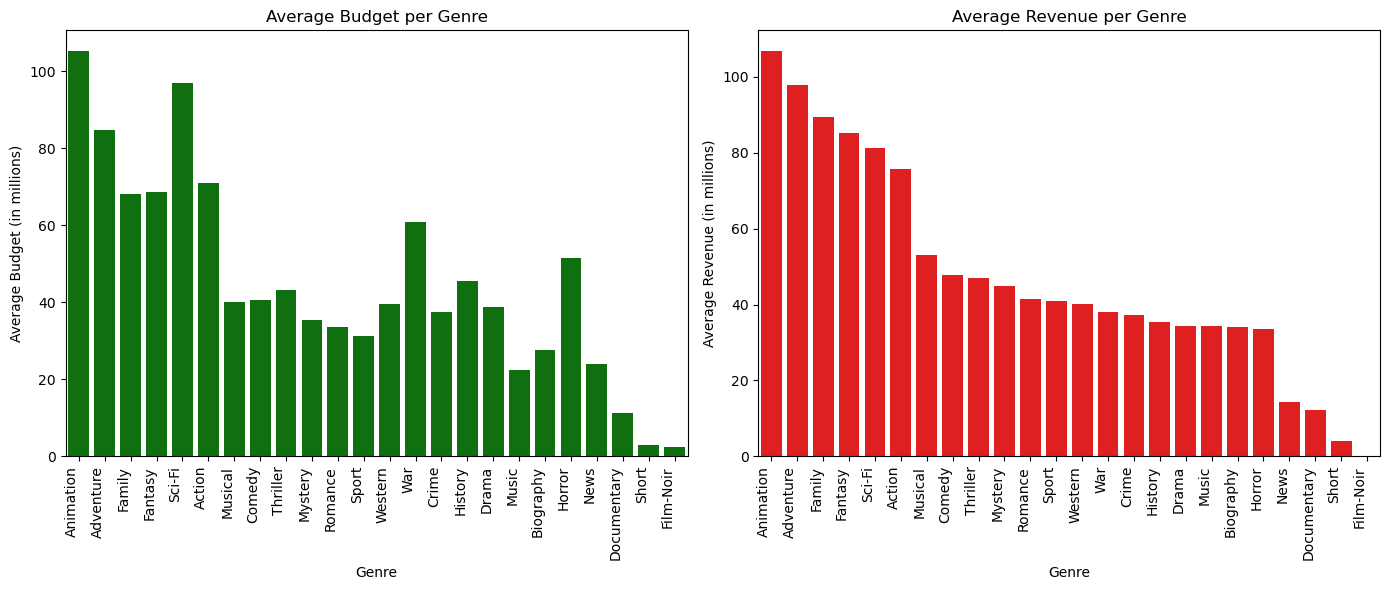

In [25]:
# Split genres into lists
df['genres_list'] = df['genres'].str.split('|')
# Explode genres
df_exploded = df.explode('genres_list').rename(columns={'genres_list': 'genre'})
# Group by genre to calculate averages
genre_budget_revenue = (df_exploded.groupby('genre')[['budget', 'gross']].mean().sort_values(by='gross', ascending=False))

print("Average Budget and Revenue per Genre:")
print(genre_budget_revenue)

# Visualization — Two bar charts side-by-side
plt.figure(figsize=(14, 6))

# Average Budget
plt.subplot(1, 2, 1)
sns.barplot(x=genre_budget_revenue.index, y=genre_budget_revenue['budget']/1000000,color='green')
plt.title('Average Budget per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Budget (in millions)')
plt.xticks(rotation=90, ha='right')

# Average Revenue
plt.subplot(1, 2, 2)
sns.barplot(x=genre_budget_revenue.index, y=genre_budget_revenue['gross']/1000000,color='red')
plt.title('Average Revenue per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue (in millions)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

10. Which actor appears most frequently in high-grossing movies?

Most frequent actor in high-grossing movies: Morgan Freeman (26 movies)


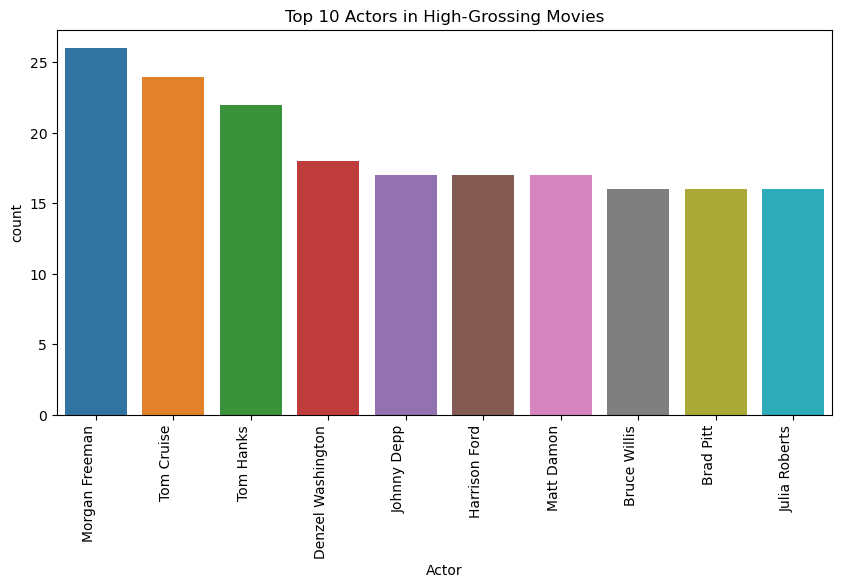

In [26]:
# Find threshold for high-grossing
threshold = df['gross'].quantile(0.75)

# Filter  only high-grossing movies
high_gross_df = (df.assign(actors_list=df[['actor_1_name', 'actor_2_name', 'actor_3_name']].values.tolist()).loc[df['gross'] >= threshold])

# Combine all actors into one column
high_gross_df = high_gross_df.explode('actors_list').rename(columns={'actors_list': 'Actor'})

#  Count appearances
actor_counts = high_gross_df['Actor'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'count']

# Show top actor
top_actor = actor_counts.iloc[0]
print(f"Most frequent actor in high-grossing movies: {top_actor['Actor']} ({top_actor['count']} movies)")

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(data=actor_counts.head(10), x='Actor', y='count', hue='Actor')
plt.title('Top 10 Actors in High-Grossing Movies')
plt.xticks(rotation=90, ha='right')
plt.show()

11.Do color films perform better than black-and-white films in terms of revenue and rating?

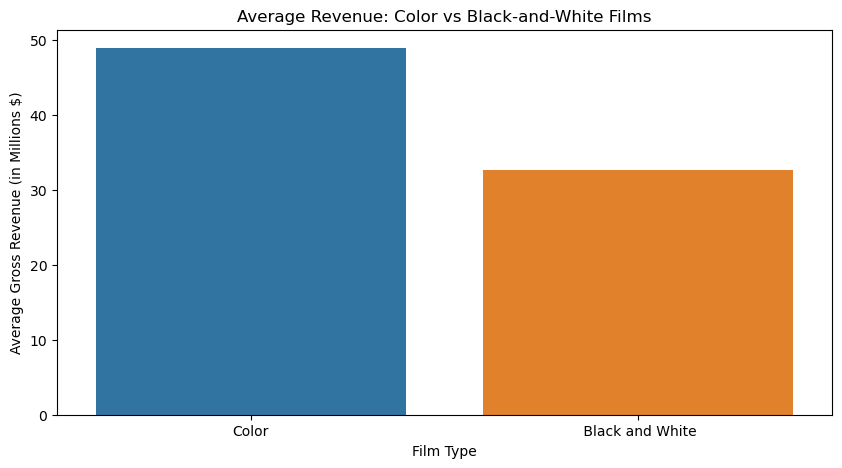

In [27]:
color_stats = df.groupby('color').agg(avg_gross=('gross', 'mean'),avg_rating=('imdb_score', 'mean')).sort_values(by='avg_gross',ascending = False).reset_index()
color_stats['avg_gross_million'] = color_stats['avg_gross'] / 1000000
#Plotting graph
plt.figure(figsize=(10, 5))
sns.barplot(data=color_stats, x='color', y='avg_gross_million', hue='color')
plt.title('Average Revenue: Color vs Black-and-White Films')
plt.ylabel('Average Gross Revenue (in Millions $)')
plt.xlabel('Film Type')
plt.show()

INFERENCE : Color films tend to have higher average gross revenue compared to black-and-white films 

12. How does the number of user reviews affect the IMDb rating?

Pearson Correlation: 0.309
P-value: 1.403e-91


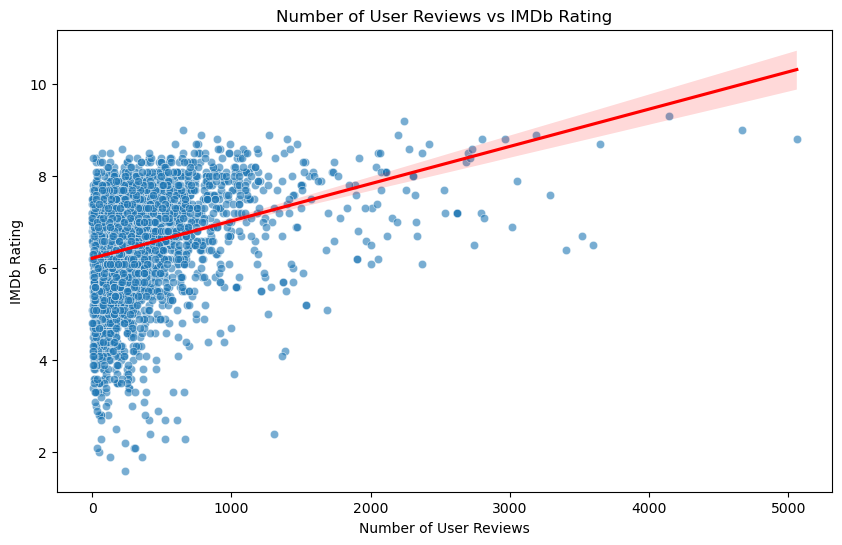

In [28]:
# Calculate Pearson correlation
corr, p_value = pearsonr(df['num_user_for_reviews'], df['imdb_score'])
print(f"Pearson Correlation: {corr:.3f}")
print(f"P-value: {p_value:.3e}")
# Scatter plot to see relationship between number of user reviews and IMDb rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='num_user_for_reviews', y='imdb_score', alpha=0.6)

# Add regression line to see the trend
sns.regplot(data=df, x='num_user_for_reviews', y='imdb_score', scatter=False, color='red')

plt.title('Number of User Reviews vs IMDb Rating')
plt.xlabel('Number of User Reviews')
plt.ylabel('IMDb Rating')
plt.show()


There is a moderate positive correlation (0.309) between the number of user reviews and IMDb ratings.Movies with more user reviews tend to have slightly higher ratings.
p-value confirms this relationship is statistically significant.
Most movies have few reviews, but ratings tend to rise with more reviews. Few films get very high review counts.


13. Which countries produce the most movies, and how do they perform?

       country       Revenue
0          USA  17645.985517
1           UK   1172.511134
2      Germany    240.804589
3       France    197.827671
4    Australia    168.864820
5       Canada    161.510880
6  New Zealand    129.816052
7        Japan     57.041292
8        China     26.844215
9        Spain     22.974947


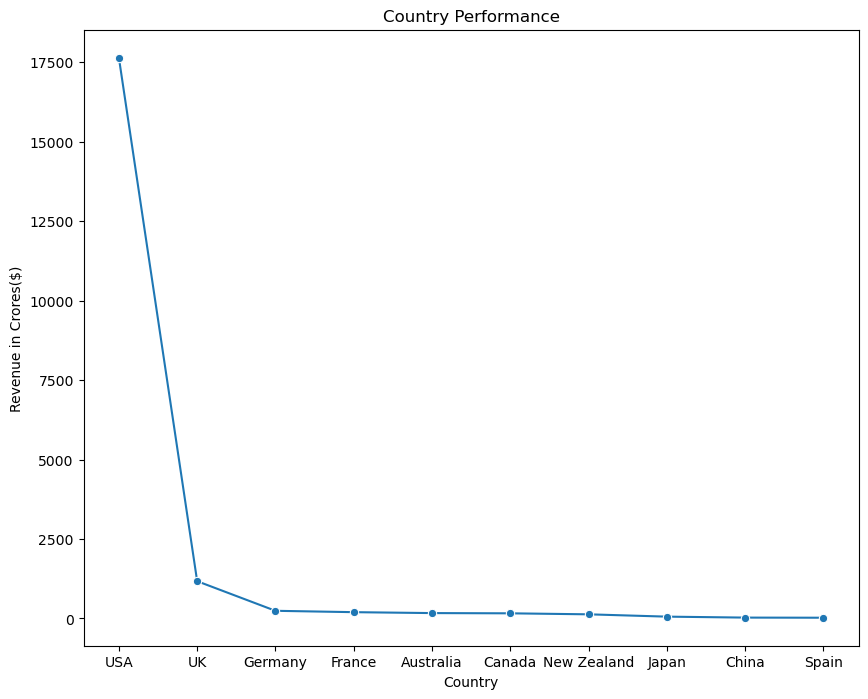

In [29]:
country_performance= df.groupby('country')['gross'].agg(Revenue ='sum').sort_values(by='Revenue',ascending = False)
top_countries = country_performance.head(10).reset_index()
top_countries['Revenue']=top_countries['Revenue']/10000000
print(top_countries)
#visualization
plt.figure(figsize=(10,8))
sns.lineplot(data=top_countries, x='country', y='Revenue', marker='o')
plt.xlabel('Country')
plt.ylabel('Revenue in Crores($)')
plt.title('Country Performance')
plt.show()

14.	How has average movie revenue changed over the years?

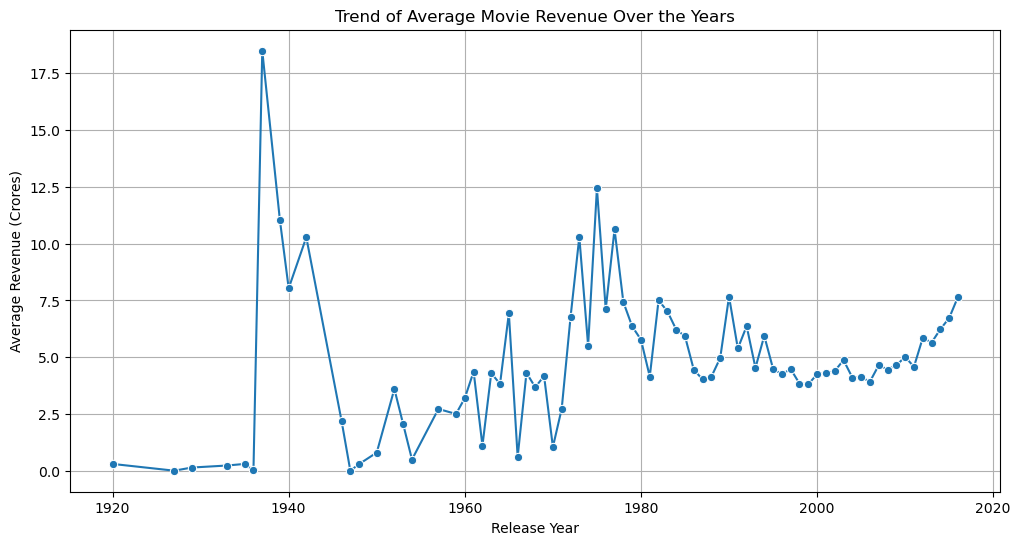

In [30]:
# Group by year and calculate average revenue
yearly_revenue = df.groupby('title_year')['gross'].mean().reset_index().sort_values(by='title_year')
yearly_revenue['gross_crores'] = yearly_revenue['gross'] / 10000000
# Visualization
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_revenue, x='title_year', y='gross_crores', marker='o')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue (Crores)')
plt.title('Trend of Average Movie Revenue Over the Years')
plt.grid(True)
plt.show()


15.	What is the average budget and revenue per genre?

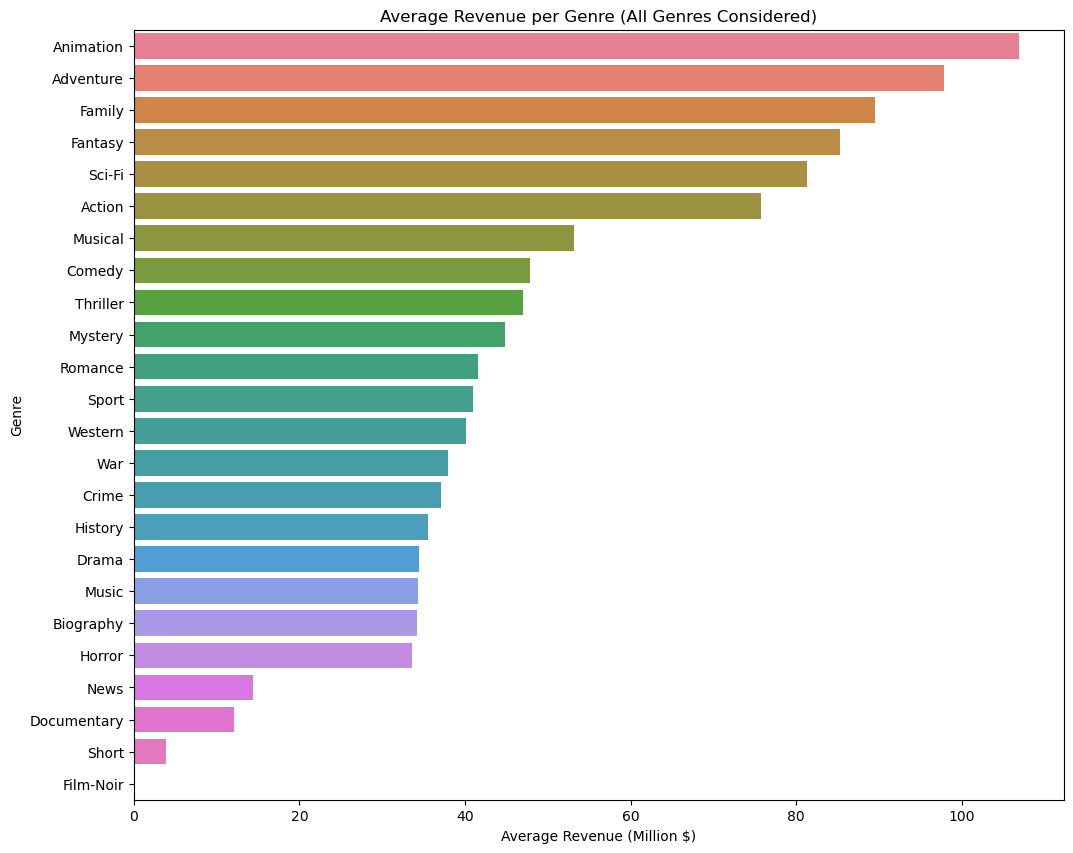

In [31]:
# Split genres into lists
df['genres_list'] = df['genres'].str.split('|')

# Explode genres so each genre has its own row
df_exploded = df.explode('genres_list').rename(columns={'genres_list': 'genre'})

# Group by genre and calculate average budget & revenue
genre_stats = df_exploded.groupby('genre').agg(avg_revenue=('gross', 'mean')).reset_index().sort_values(by='avg_revenue', ascending=False)

# Convert to million $
genre_stats['avg_revenue'] = genre_stats['avg_revenue'] / 1000000

# Visualization
plt.figure(figsize=(12, 10))
sns.barplot(data=genre_stats, y='genre', x='avg_revenue', hue='genre')
plt.xlabel('Average Revenue (Million $)')
plt.ylabel('Genre')
plt.title('Average Revenue per Genre (All Genres Considered)')
plt.show()